In [1]:
import pandas as pd

train_features = pd.read_csv('train_x_region.csv')
test_features = pd.read_csv('test_x_region.csv')
train_labels = pd.read_csv('train_y.csv')

In [2]:
train_features.min()
train_features.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09


In [3]:
#test_features.max()
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
Year                             61 non-null int64
Country                          61 non-null object
Happiness Rank                   61 non-null int64
Happiness Score                  61 non-null float64
Economy (GDP per Capita)         61 non-null float64
Family                           61 non-null float64
Health (Life Expectancy)         61 non-null float64
Freedom                          61 non-null float64
Trust (Government Corruption)    61 non-null float64
Generosity                       61 non-null float64
Population Estimate              61 non-null int64
Region                           61 non-null object
dtypes: float64(7), int64(3), object(2)
memory usage: 5.8+ KB


In [4]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
Year                             242 non-null int64
Country                          242 non-null object
Happiness Rank                   242 non-null int64
Happiness Score                  242 non-null float64
Economy (GDP per Capita)         242 non-null float64
Family                           242 non-null float64
Health (Life Expectancy)         242 non-null float64
Freedom                          242 non-null float64
Trust (Government Corruption)    242 non-null float64
Generosity                       242 non-null float64
Population Estimate              242 non-null int64
Region                           242 non-null object
dtypes: float64(7), int64(3), object(2)
memory usage: 22.8+ KB


##### Correlation

In [5]:
cat_df = pd.concat([train_features,train_labels],axis=1)
cat_df
corr = cat_df.corr()
corr['Immigration to the United States'].sort_values(ascending=False)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Happiness Rank                      0.126923
Year                               -0.017201
Economy (GDP per Capita)           -0.030175
Freedom                            -0.042866
Trust (Government Corruption)      -0.058378
Happiness Score                    -0.134443
Health (Life Expectancy)           -0.147452
Generosity                         -0.170803
Family                             -0.186854
Name: Immigration to the United States, dtype: float64

In [6]:
import matplotlib.pyplot as plt

train_features.hist(bins=50, figsize=(20, 15))
plt.show()

<Figure size 2000x1500 with 12 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D7009DA58>,
      dtype=object)

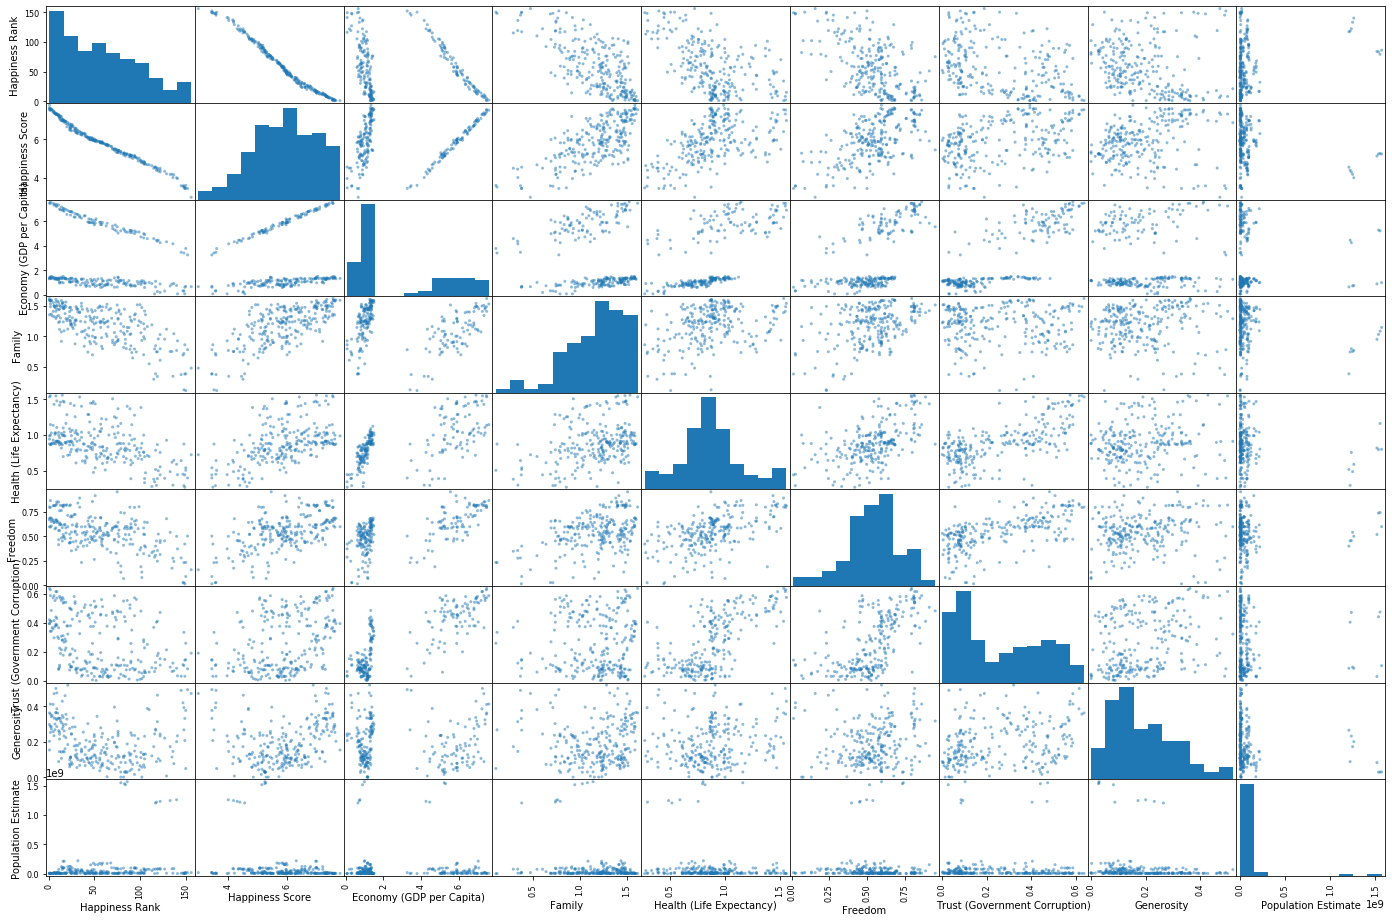

In [7]:
from pandas.plotting import scatter_matrix

attributes = ['Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family',
              'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Population Estimate']
scatter_matrix(train_features[attributes], figsize=(24,16))
#are relationships linear, polynomial, messy (use linear for some polynomial for others)

###### Feature Engineering
Dropping string columns to replace with numbers

In [8]:
Country = cat_df['Country']
Country_test = test_features['Country']
Country
Region = cat_df['Region']
Region_test = test_features['Region']
new_df = cat_df.drop(['Region','Country'],axis=1)
test_df = cat_df.drop(['Region','Country'],axis=1)
new_df

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States
0,2016,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,5473.0
1,2018,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,11481.0
2,2019,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,2466.0
3,2019,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,1425.0
4,2016,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,3397.0
5,2015,76,5.332,1.060980,0.946320,0.731720,0.228150,0.157460,0.122530,80863863,8762.0
6,2016,2,7.509,7.590000,1.527330,1.145240,0.863030,0.585570,0.412030,8827248,1090.0
7,2016,120,4.362,4.465000,0.953950,0.498130,0.521160,0.188470,0.103930,85652153,13367.0
8,2018,49,5.956,0.807000,1.101000,0.474000,0.593000,0.089000,0.183000,307822,637.0
9,2019,76,5.430,1.438000,1.277000,1.122000,0.440000,0.287000,0.258000,8378754,2377.0


### numerizing string features (country, region)
##### Decided to try this instead of one hot encoding because this made more sense to me

In [9]:
codes,uniques=pd.factorize(Region)
codes = pd.DataFrame(codes,columns = ["Region"])
new_df = pd.concat([new_df,codes],axis=1)

test_codes,test_uniques = pd.factorize(Region_test)
test_codes = pd.DataFrame(test_codes,columns=['Region'])
test_df = pd.concat([test_df,codes],axis=1)

In [10]:
codes,uniques=pd.factorize(Country) #get a number unique to string
codes = pd.DataFrame(codes,columns = ["Country"]) #renaming the column name
cat_df = pd.concat([new_df,codes],axis=1)
cat_df

test_codes,test_uniques = pd.factorize(Country_test)
test_codes = pd.DataFrame(test_codes,columns=['Country'])
test_df = pd.concat([test_df,codes],axis=1)

##### I want to create new features

In [11]:
new_df['Happiness per Person'] = new_df['Happiness Score'] / new_df['Population Estimate']
new_df['Money buys Happiness'] = new_df['Economy (GDP per Capita)'] * new_df['Happiness Score']
new_df['Money brings freedom'] = new_df['Economy (GDP per Capita)'] * new_df['Freedom']
new_df #why is Happiness per Person replacing the column for Countries????

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States,Region,Happiness per Person,Money buys Happiness,Money brings freedom
0,2016,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,5473.0,0,8.722914e-08,42.489202,5.496114
1,2018,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,11481.0,1,1.647335e-07,4.786776,0.132468
2,2019,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,2466.0,1,1.538758e-06,7.410678,0.576972
3,2019,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,1425.0,1,5.617918e-07,4.484504,0.396536
4,2016,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,3397.0,1,9.995626e-07,36.593144,3.982558
5,2015,76,5.332,1.060980,0.946320,0.731720,0.228150,0.157460,0.122530,80863863,8762.0,0,6.593798e-08,5.657145,0.242063
6,2016,2,7.509,7.590000,1.527330,1.145240,0.863030,0.585570,0.412030,8827248,1090.0,0,8.506615e-07,56.993310,6.550398
7,2016,120,4.362,4.465000,0.953950,0.498130,0.521160,0.188470,0.103930,85652153,13367.0,2,5.092692e-08,19.476330,2.326979
8,2018,49,5.956,0.807000,1.101000,0.474000,0.593000,0.089000,0.183000,307822,637.0,1,1.934884e-05,4.806492,0.478551
9,2019,76,5.430,1.438000,1.277000,1.122000,0.440000,0.287000,0.258000,8378754,2377.0,3,6.480677e-07,7.808340,0.632720


In [12]:
corr_matrix = new_df.corr()
corr_matrix['Immigration to the United States'].sort_values(ascending=False).abs()
#soo the countries with higher population have more people moving to the US...
#what about the economy and happiness? nope still low corr...
#how about freedom and money? if low corr, then more money means less immigrate?

Immigration to the United States    1.000000
Population Estimate                 0.445795
Region                              0.244233
Happiness Rank                      0.126923
Year                                0.017201
Economy (GDP per Capita)            0.030175
Freedom                             0.042866
Money brings freedom                0.053644
Trust (Government Corruption)       0.058378
Money buys Happiness                0.060497
Happiness per Person                0.128879
Happiness Score                     0.134443
Health (Life Expectancy)            0.147452
Generosity                          0.170803
Family                              0.186854
Name: Immigration to the United States, dtype: float64

##### seems like population has the largest correlation to immigration to the US

### Linear regression

In [13]:
from sklearn.linear_model import LinearRegression

target = new_df['Immigration to the United States']

new_df.drop(['Immigration to the United States'],axis=1)
reg = LinearRegression()
reg.fit(new_df,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.score(new_df, target)#wow lets goooo 100% accuracy... no I know something is wrong but... im not so sure
#oh just realized we did not make a prediction yet so testing target to target would be 100% ... i think 
#this makes sense now

1.0

## Linear Regression testing

In [15]:
score = reg.predict(new_df)

final = pd.DataFrame(score)
final.to_csv("dc1.csv")

## Logistic Regression

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(new_df).toarray()
x_test_counts = count_vect.transform(test_df).toarray()
print(x_test_counts.shape)

#get test targets
test_target = test_df['Immigration to the United States']

(13, 29)


In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(test_df, test_target)

C:\Users\alima\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alima\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
hyp = clf.predict(test_df)
print(hyp)

[ 11657.  43478.   2289.   1664.   9767.  43478.   1664.  43478.   4085.
   9767.  43478.  43478.   9767.  77658.   4085.   2289.   9135.  11657.
  13965.   1664.   1664.   1664.   9135.  43478.   4085.  49815.   1664.
  13965.   3191.   7442.  43478.   1664.   2289.  43478.   9767.  43478.
  43478.  43478.   9135.  13965.  57155.   2289.  61848.   1664.  15172.
  13965.   1664.   8219.   9135.   9135.   1664.  57155.   1664.   4085.
   1664.   2289.   3191.   9767. 153502.   1664.  43478.   1664.  43478.
  57155.   9767.  13965. 153502.  43478.  43478.  77658.   1664. 172726.
  60613.  66479.  57155.   1664.  43478.  77658.  43478.   9767.  43478.
  77658.  38944.   3191.  77658.  43478.  43478.  13965.   1664.  43478.
   3191.  13965.   1664.  50609.  13965.   1664.   1664.  23185.  43478.
  43478.  43478.  57155.   1664.  61848.   9135.  43478.  22833.   1664.
   1664.  15172.  57155.   1664.  43478.   9135.   7442.  58384.   9135.
  11657.  49815.  57155.   9767.   1664.   1664.   

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(test_target, hyp) #nice... 4% :(

0.04132231404958678

Going to use the Linear Regression model for submission. 